# Why not using L2 regularization is better than L2 regularization?

#### Case of MNIST

### Background

We are having a study group for Stockholm AI soon. During a discussion with my friend, Carl, I told him that it is common to use L2 regularization and L1 at the same time. We then continued the dicussion and I started to wonder: would it actually perform the performance of a simple MLP on a simple data like MNIST? But then I started a simple experiment: let's compare the performance of an MLP with no regularization with L1, L2 and a combination of L1 and L2 regularization.

### Experiment

Before anything else, let's ensure reproducibility:

In [11]:
import numpy
import tensorflow

numpy.random.seed(7)
tensorflow.set_random_seed(2)

I usually like to import everything first: 

In [50]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import regularizers
from keras import optimizers
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

Here is a simple MLP from Keras' examples running MNIST:

In [13]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


### A simple MLP with no regularization

Here is the simplest MLP one can find. The point with this MLP is not that it should be the state-of-the-art among MLPs, since the model is not going to change:

In [14]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
# model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# model.summary()

optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.2198 - acc: 0.9315 - val_loss: 0.1033 - val_acc: 0.9667
Epoch 2/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0822 - acc: 0.9745 - val_loss: 0.1036 - val_acc: 0.9672
Epoch 3/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0541 - acc: 0.9832 - val_loss: 0.0741 - val_acc: 0.9797
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0391 - acc: 0.9879 - val_loss: 0.0712 - val_acc: 0.9804
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0292 - acc: 0.9909 - val_loss: 0.0799 - val_acc: 0.9807
Epoch 6/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0238 - acc: 0.9929 - val_loss: 0.0948 - val_acc: 0.9784
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0195 - acc: 0.9940 - val_loss: 0.0946 - val_acc

### L2 regularization

So we all know that L2 regularization helps generalizatin of a neural network or any ML model, right? I thought so too. So I started checking the usual parameter for L2 regulariztion, namely 0.001:

In [8]:
model_2 = Sequential()
model_2.add(Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)))
# model_2.add(Dropout(0.2))
model_2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model_2.add(Dropout(0.2))
model_2.add(Dense(num_classes, activation='softmax'))

# model_2.summary()

optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score_2 = model_2.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.6337 - acc: 0.9214 - val_loss: 0.3201 - val_acc: 0.9552
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2652 - acc: 0.9608 - val_loss: 0.2342 - val_acc: 0.9627
Epoch 3/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.2068 - acc: 0.9675 - val_loss: 0.2404 - val_acc: 0.9535
Epoch 4/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1785 - acc: 0.9715 - val_loss: 0.1863 - val_acc: 0.9640
Epoch 5/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1617 - acc: 0.9734 - val_loss: 0.1560 - val_acc: 0.9756
Epoch 6/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1517 - acc: 0.9748 - val_loss: 0.1821 - val_acc: 0.9648
Epoch 7/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1425 - acc: 0.9764 - val_loss: 0.1485 - val_acc

I was confused a bit. How can the network with L2 regularization perform worse than the one without it? Isn't one the promise of regularization is to help generalization? Could it be that the L2 coefficient needs more tuning?

### Hyperparamter optimization of L2 regularization

In [55]:
def objective(params):
    model_2 = Sequential()
    model_2.add(Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(params['l2'])))
    # model_2.add(Dropout(0.2))
    model_2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(params['l2'])))
    # model_2.add(Dropout(0.2))
    model_2.add(Dense(num_classes, activation='softmax'))

    model_2.summary()
    
    print('training with L2 regularization parameter', params['l2'])
    
    model_2.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history_2 = model_2.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
    score_2 = model_2.evaluate(x_test, y_test, verbose=0)
    
    print('Test loss:', score_2[0])
    print('Test accuracy:', score_2[1])

    return {'loss': score_2[0], 'status': STATUS_OK} 

space = {
    'l2': hp.uniform('l2', 0.0001, 5)
}

trials = Trials()
best = fmax(objective, space, algo=tpe.suggest, trials=trials, max_evals = 30)
print (best)
print (trials.best_trial)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_206 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_207 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_208 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
training with L2 regularization parameter 4.9411116557115164
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 106us/step - loss: 176.0764 - acc: 0.1344 - val_loss: 3.1220 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 3.1216 - acc: 0.1112 - val_loss: 3.1211 - val_acc: 0.1135
Epoch 3/20
6

60000/60000 [==============================] - 6s 105us/step - loss: 172.9070 - acc: 0.1395 - val_loss: 3.1044 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 4s 71us/step - loss: 3.1044 - acc: 0.1121 - val_loss: 3.1038 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 4s 71us/step - loss: 3.1042 - acc: 0.1122 - val_loss: 3.1037 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 3.1040 - acc: 0.1124 - val_loss: 3.1037 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 4s 71us/step - loss: 3.1039 - acc: 0.1124 - val_loss: 3.1036 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 4s 70us/step - loss: 3.1039 - acc: 0.1124 - val_loss: 3.1036 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 4s 70us/step - loss: 3.1039 - acc: 0.1124 - val_loss: 3.1035 - val_acc: 0.1135
Epoch 8/20
60000/60000 [=========================

60000/60000 [==============================] - 4s 71us/step - loss: 2.8989 - acc: 0.1124 - val_loss: 2.8987 - val_acc: 0.1135
Epoch 8/20
60000/60000 [==============================] - 4s 71us/step - loss: 2.8989 - acc: 0.1124 - val_loss: 2.8986 - val_acc: 0.1135
Epoch 9/20
60000/60000 [==============================] - 4s 71us/step - loss: 2.8988 - acc: 0.1124 - val_loss: 2.8985 - val_acc: 0.1135
Epoch 10/20
60000/60000 [==============================] - 4s 71us/step - loss: 2.8988 - acc: 0.1124 - val_loss: 2.8985 - val_acc: 0.1135
Epoch 11/20
60000/60000 [==============================] - 4s 72us/step - loss: 2.8988 - acc: 0.1124 - val_loss: 2.8986 - val_acc: 0.1135
Epoch 12/20
60000/60000 [==============================] - 4s 70us/step - loss: 2.8988 - acc: 0.1124 - val_loss: 2.8985 - val_acc: 0.1135
Epoch 13/20
60000/60000 [==============================] - 4s 70us/step - loss: 2.8988 - acc: 0.1124 - val_loss: 2.8985 - val_acc: 0.1135
Epoch 14/20
60000/60000 [=======================

60000/60000 [==============================] - 4s 62us/step - loss: 3.1203 - acc: 0.1124 - val_loss: 3.1201 - val_acc: 0.1135
Epoch 14/20
60000/60000 [==============================] - 4s 64us/step - loss: 3.1203 - acc: 0.1124 - val_loss: 3.1201 - val_acc: 0.1135
Epoch 15/20
60000/60000 [==============================] - 4s 62us/step - loss: 3.1203 - acc: 0.1124 - val_loss: 3.1201 - val_acc: 0.1135
Epoch 16/20
60000/60000 [==============================] - 4s 62us/step - loss: 3.1203 - acc: 0.1124 - val_loss: 3.1201 - val_acc: 0.1135
Epoch 17/20
60000/60000 [==============================] - 4s 62us/step - loss: 3.1203 - acc: 0.1124 - val_loss: 3.1201 - val_acc: 0.1135
Epoch 18/20
60000/60000 [==============================] - 4s 63us/step - loss: 3.1203 - acc: 0.1124 - val_loss: 3.1201 - val_acc: 0.1135
Epoch 19/20
60000/60000 [==============================] - 4s 62us/step - loss: 3.1203 - acc: 0.1124 - val_loss: 3.1201 - val_acc: 0.1135
Epoch 20/20
60000/60000 [=====================

60000/60000 [==============================] - 4s 63us/step - loss: 3.0713 - acc: 0.1124 - val_loss: 3.0711 - val_acc: 0.1135
Epoch 20/20
60000/60000 [==============================] - 4s 63us/step - loss: 3.0713 - acc: 0.1124 - val_loss: 3.0711 - val_acc: 0.1135
Test loss: 3.071059013748169
Test accuracy: 0.1135
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_233 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_234 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_235 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
training with L2 regularization parameter 0.7515436302009422
Train on 60000 samples, 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 122.1014 - acc: 0.1461 - val_loss: 2.8670 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 2.8666 - acc: 0.1101 - val_loss: 2.8657 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 2.8663 - acc: 0.1104 - val_loss: 2.8658 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 2.8661 - acc: 0.1122 - val_loss: 2.8655 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 4s 64us/step - loss: 2.8660 - acc: 0.1124 - val_loss: 2.8656 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 4s 63us/step - loss: 2.8659 - acc: 0.1124 - val_loss: 2.8655 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 2.8659 - acc: 0.1124 - val_loss: 2.8655 - val_

60000/60000 [==============================] - 4s 73us/step - loss: 2.5248 - acc: 0.1124 - val_loss: 2.5245 - val_acc: 0.1135
Epoch 8/20
60000/60000 [==============================] - 4s 72us/step - loss: 2.5248 - acc: 0.1124 - val_loss: 2.5246 - val_acc: 0.1135
Epoch 9/20
60000/60000 [==============================] - 4s 72us/step - loss: 2.5248 - acc: 0.1124 - val_loss: 2.5244 - val_acc: 0.1135
Epoch 10/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.5247 - acc: 0.1124 - val_loss: 2.5244 - val_acc: 0.1135
Epoch 11/20
60000/60000 [==============================] - 4s 72us/step - loss: 2.5247 - acc: 0.1124 - val_loss: 2.5246 - val_acc: 0.1135
Epoch 12/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.5247 - acc: 0.1124 - val_loss: 2.5244 - val_acc: 0.1135
Epoch 13/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.5247 - acc: 0.1124 - val_loss: 2.5245 - val_acc: 0.1135
Epoch 14/20
60000/60000 [=======================

60000/60000 [==============================] - 4s 73us/step - loss: 2.9742 - acc: 0.1124 - val_loss: 2.9742 - val_acc: 0.1135
Epoch 14/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.9743 - acc: 0.1124 - val_loss: 2.9740 - val_acc: 0.1135
Epoch 15/20
60000/60000 [==============================] - 4s 72us/step - loss: 2.9743 - acc: 0.1124 - val_loss: 2.9741 - val_acc: 0.1135
Epoch 16/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.9743 - acc: 0.1124 - val_loss: 2.9740 - val_acc: 0.1135
Epoch 17/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.9743 - acc: 0.1124 - val_loss: 2.9740 - val_acc: 0.1135
Epoch 18/20
60000/60000 [==============================] - 4s 74us/step - loss: 2.9742 - acc: 0.1124 - val_loss: 2.9740 - val_acc: 0.1135
Epoch 19/20
60000/60000 [==============================] - 4s 72us/step - loss: 2.9743 - acc: 0.1124 - val_loss: 2.9740 - val_acc: 0.1135
Epoch 20/20
60000/60000 [=====================

60000/60000 [==============================] - 4s 74us/step - loss: 2.6004 - acc: 0.1124 - val_loss: 2.6002 - val_acc: 0.1135
Epoch 20/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.6004 - acc: 0.1124 - val_loss: 2.6001 - val_acc: 0.1135
Test loss: 2.600121851348877
Test accuracy: 0.1135
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_260 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_261 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_262 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
training with L2 regularization parameter 4.882268556339547
Train on 60000 samples, v

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 116us/step - loss: 81.3187 - acc: 0.1375 - val_loss: 2.6761 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.6746 - acc: 0.1111 - val_loss: 2.6744 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.6745 - acc: 0.1121 - val_loss: 2.6741 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.6744 - acc: 0.1124 - val_loss: 2.6738 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.6742 - acc: 0.1124 - val_loss: 2.6739 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 4s 74us/step - loss: 2.6742 - acc: 0.1124 - val_loss: 2.6740 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.6742 - acc: 0.1124 - val_loss: 2.6740 - val_a

60000/60000 [==============================] - 4s 72us/step - loss: 0.2982 - acc: 0.9531 - val_loss: 0.2761 - val_acc: 0.9596
Epoch 8/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2888 - acc: 0.9550 - val_loss: 0.2943 - val_acc: 0.9516
Epoch 9/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2796 - acc: 0.9553 - val_loss: 0.2847 - val_acc: 0.9522
Epoch 10/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2740 - acc: 0.9566 - val_loss: 0.2569 - val_acc: 0.9595
Epoch 11/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2673 - acc: 0.9568 - val_loss: 0.2736 - val_acc: 0.9574
Epoch 12/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2650 - acc: 0.9572 - val_loss: 0.2905 - val_acc: 0.9491
Epoch 13/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2611 - acc: 0.9578 - val_loss: 0.3046 - val_acc: 0.9422
Epoch 14/20
60000/60000 [=======================

60000/60000 [==============================] - 4s 65us/step - loss: 0.4714 - acc: 0.9231 - val_loss: 0.4891 - val_acc: 0.9117
Epoch 14/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.4683 - acc: 0.9219 - val_loss: 0.4798 - val_acc: 0.9102
Epoch 15/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.4619 - acc: 0.9232 - val_loss: 0.4368 - val_acc: 0.9261
Epoch 16/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.4556 - acc: 0.9258 - val_loss: 0.4207 - val_acc: 0.9296
Epoch 17/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.4500 - acc: 0.9246 - val_loss: 0.4223 - val_acc: 0.9322
Epoch 18/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.4470 - acc: 0.9252 - val_loss: 0.4588 - val_acc: 0.9170
Epoch 19/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.4405 - acc: 0.9262 - val_loss: 0.4504 - val_acc: 0.9240
Epoch 20/20
60000/60000 [=====================

60000/60000 [==============================] - 4s 70us/step - loss: 1.5046 - acc: 0.5954 - val_loss: 1.5091 - val_acc: 0.6070
Epoch 20/20
60000/60000 [==============================] - 4s 69us/step - loss: 1.4986 - acc: 0.5972 - val_loss: 1.4357 - val_acc: 0.6132
Test loss: 1.4357281135559081
Test accuracy: 0.6132
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_287 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_288 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_289 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
training with L2 regularization parameter 1.0499511181721517
Train on 60000 samples,

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 128us/step - loss: 36.8536 - acc: 0.1509 - val_loss: 2.4639 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.4648 - acc: 0.1126 - val_loss: 2.4660 - val_acc: 0.1028
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 2.4647 - acc: 0.1117 - val_loss: 2.4645 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 2.4644 - acc: 0.1117 - val_loss: 2.4640 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 4s 67us/step - loss: 2.4642 - acc: 0.1124 - val_loss: 2.4642 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 2.4642 - acc: 0.1124 - val_loss: 2.4640 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 2.4642 - acc: 0.1124 - val_loss: 2.4638 - val_a

### Visualizing the result

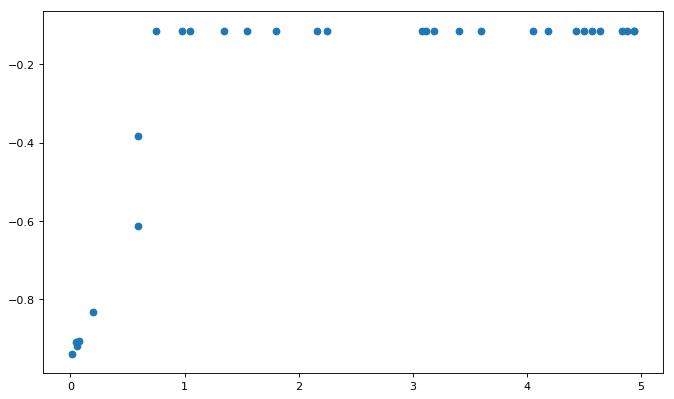

In [57]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

t = trials.trials

y = []
x = []
for tr in t: 
    y.append((tr['result']['loss']))
    x.append(tr['misc']['vals']['l2'])
    

plt.scatter(x, y)
plt.plot()
plt.show()

### Running the best model

In [53]:
l2_min = trials.best_trial['misc']['vals']['l2']

model_2 = Sequential()
model_2.add(Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(l2_min)))
# model_2.add(Dropout(0.2))
model_2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2_min)))
# model_2.add(Dropout(0.2))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score_2 = model_2.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_203 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_204 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_205 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 105us/step - loss: 2.6406 - acc: 0.8173 - val_loss: 0.7989 - val_acc: 0.8758
Epoch 2/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.7571 - acc: 0.8758 - val_loss: 0.7895 - val_acc: 0.8406
Epoch 3/20
60000/60000 [==============================] - 4s 68us/step - lo

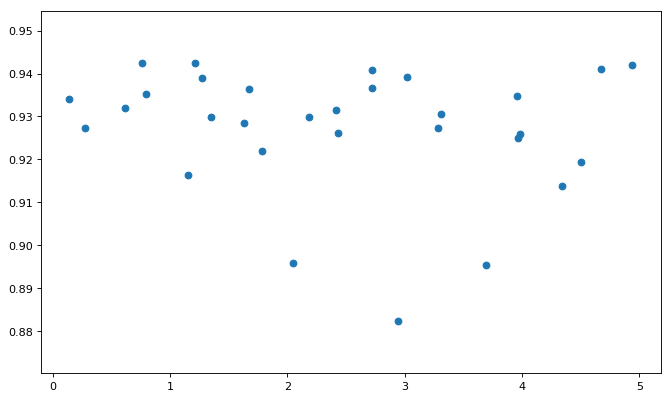

### L1 regularization

In [7]:
model_3 = Sequential()
model_3.add(Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l1(0.001)))
# model_3.add(Dropout(0.2))
model_3.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
# model_3.add(Dropout(0.2))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.summary()

model_3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score_3 = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/step - loss: 2.9080 - acc: 0.8543 - val_loss: 1.0653 - val_acc: 0.8932
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.9618 - acc: 0.9093 - val_loss: 0.8665 - val_acc: 0.9237
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - los

### L1 and L2 regularization

In [8]:
model_4 = Sequential()
model_4.add(Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
#model_4.add(Dropout(0.2))
model_4.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
#model_4.add(Dropout(0.2))
model_4.add(Dense(num_classes, activation='softmax'))

model_4.summary()

model_4.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_4 = model_4.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score_4 = model_4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_4[0])
print('Test accuracy:', score_4[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/step - loss: 2.9117 - acc: 0.8523 - val_loss: 1.0735 - val_acc: 0.8984
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.9683 - acc: 0.9058 - val_loss: 0.8827 - val_acc: 0.9142
Epoch 3/20
60000/60000 [==============================] - 4s 73us/step - los

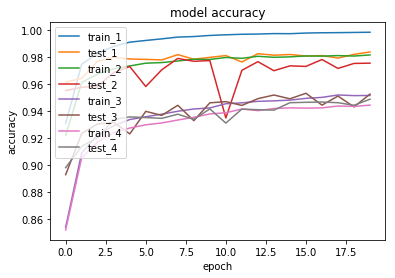

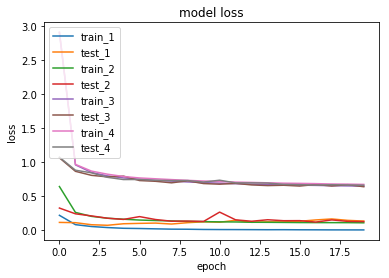

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.plot(history_3.history['acc'])
plt.plot(history_3.history['val_acc'])
plt.plot(history_4.history['acc'])
plt.plot(history_4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_1', 'test_1', 'train_2', 'test_2', 'train_3', 'test_3', 'train_4', 'test_4'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_1', 'test_1', 'train_2', 'test_2', 'train_3', 'test_3', 'train_4', 'test_4'], loc='upper left')
plt.show()